In [2]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Pre-Processing

#### Combine all gene counts to one file

In [ ]:
# Function to copy .tsv file to one folder
def copy_tsv_files(source_dir, destination_dir):
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            if file.endswith('.tsv'):
                source_file_path = os.path.join(root, file)
                destination_file_path = os.path.join(destination_dir, file)
                shutil.copy2(source_file_path, destination_file_path)

source_directory = '/Users/tk/Desktop/Research-CITS5014/RESEARCH_DATA'
destination_directory = '/Users/tk/Desktop/Research-CITS5014/data'
copy_tsv_files(source_directory, destination_directory)

In [3]:
df = pd.read_csv('/Users/tk/Desktop/Research-CITS5014/data/0a9e33db-2527-4cc3-8669-a7c10fed7a7f.rna_seq.augmented_star_gene_counts.tsv', delimiter='\t', header=1)
df.head()

,gene_id,gene_name,gene_type,unstranded,stranded_first,stranded_second,tpm_unstranded,fpkm_unstranded,fpkm_uq_unstranded
0,N_unmapped,NaN,NaN,5893106,5893106,5893106,NaN,NaN,NaN
1,N_multimapping,NaN,NaN,5181136,5181136,5181136,NaN,NaN,NaN
2,N_noFeature,NaN,NaN,3472993,40032060,40254206,NaN,NaN,NaN
3,N_ambiguous,NaN,NaN,7106268,1730200,1728819,NaN,NaN,NaN
4,ENSG00000000003.15,TSPAN6,protein_coding,5729,2888,2841,72.3741,18.3759,18.0361


In [163]:
folder_path = '/Users/tk/Desktop/Research-CITS5014/data'
final_df = None

def process_dataframe(file_name, file_index):
    file_path = '/Users/tk/Desktop/Research-CITS5014/data/' + file_name
    df = pd.read_csv(file_path, delimiter='\t', header=1)
    df = df.iloc[4:]  
    if file_index == 1:
        df_gene = df[['gene_id']].rename(columns={'gene_id': 'file_name'})
        count_col = df[['unstranded']].rename(columns={'unstranded': file_name})
        
        concatenated_df = pd.concat([df_gene.T, count_col.T], axis=0)
    else:
        count_col = df[['unstranded']].rename(columns={'unstranded': file_name})
        concatenated_df = count_col.T

    return concatenated_df

# Combine all files to one
for idx, file_name in enumerate(os.listdir(folder_path)):
    if file_name.endswith('.tsv'):
        file_path = os.path.join(folder_path, file_name)
        combined_df = process_dataframe(file_name, idx + 1)
        if combined_df is not None:
            if final_df is None:
                final_df = combined_df
            else:
                final_df = pd.concat([final_df, combined_df], axis = 0)

In [ ]:
# Save to .csv file
final_df.to_csv('/Users/tk/Desktop/Research-CITS5014/data/gene_count.csv', header=0)

#### Merging all 3 files (raw gene counts, survival time, sample sheet)

In [154]:
df = pd.read_csv('/Users/tk/Desktop/Research-CITS5014/data/gene_count.csv')
ss = pd.read_csv('gdc_sample_sheet.2024-03-26.tsv', delimiter='\t')
clinical = pd.read_csv('/Users/tk/Desktop/Research-CITS5014/clinical.tsv', delimiter='\t')

In [155]:
df.head()

,file_name,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
0,7be7033e-db49-45cd-8ea5-827266707b1e.rna_seq.a...,2423,875,1244,554,163,4942,6275,2718,1984,...,0,0,24,0,0,2,287,0,18,22
1,da549530-7ba5-4302-acd2-40a766860216.rna_seq.a...,3820,105,1705,1678,292,395,1180,1140,1916,...,0,1,28,0,1,0,399,0,3,10
2,fc70931f-4a97-4538-b055-8ed988ab601c.rna_seq.a...,1021,87,1725,2043,573,3015,3865,3097,1861,...,0,1,40,0,0,0,304,0,6,47
3,cf3fe851-479f-4d22-9daf-99b163d0ed06.rna_seq.a...,3743,10,2321,507,387,688,2910,2217,613,...,0,0,10,0,0,0,96,0,5,44
4,66941b24-9c8f-4657-a4eb-8cc267e38bdc.rna_seq.a...,4901,2,2691,2350,791,119,896,1752,1508,...,0,0,3,0,0,0,370,0,4,28


In [156]:
ss.head()

,File ID,File Name,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type
0,50721c97-1a23-405b-b7b3-2955e4c62e5a,00063026-2a67-41de-b105-f80dca277978.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-E9-A1NF,TCGA-E9-A1NF-11A,Solid Tissue Normal
1,536c6d8e-8df3-45e4-8413-36aadeeb5864,00063026-2a67-41de-b105-f80dca277978.rna_seq.s...,Transcriptome Profiling,Splice Junction Quantification,TCGA-BRCA,TCGA-E9-A1NF,TCGA-E9-A1NF-11A,Solid Tissue Normal
2,f1dc7a14-29f1-4fe1-bc67-01e0776d6b40,00a26384-1b1c-4db4-9664-75fb9b3febdb.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-OL-A5RV,TCGA-OL-A5RV-01A,Primary Tumor
3,9f205e64-5c59-425a-8387-2bde5ad2b8b6,00a26384-1b1c-4db4-9664-75fb9b3febdb.rna_seq.s...,Transcriptome Profiling,Splice Junction Quantification,TCGA-BRCA,TCGA-OL-A5RV,TCGA-OL-A5RV-01A,Primary Tumor
4,1deadf31-dc7d-4361-8041-ab0a27edebb3,01661d94-fc16-4456-95cf-a5fa4e1e196c.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-BH-A0HY,TCGA-BH-A0HY-01A,Primary Tumor


In [157]:
clinical.head()

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,001cef41-ff86-4d3f-a140-a647ac4b10a1,TCGA-E2-A1IU,TCGA-BRCA,60,'--,'--,'--,'--,-22279,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
1,001cef41-ff86-4d3f-a140-a647ac4b10a1,TCGA-E2-A1IU,TCGA-BRCA,60,'--,'--,'--,'--,-22279,'--,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
2,0045349c-69d9-4306-a403-c9c1fa836644,TCGA-A1-A0SB,TCGA-BRCA,70,'--,'--,'--,'--,-25833,'--,...,'--,'--,'--,'--,'--,'--,'--,not reported,'--,"Radiation Therapy, NOS"
3,0045349c-69d9-4306-a403-c9c1fa836644,TCGA-A1-A0SB,TCGA-BRCA,70,'--,'--,'--,'--,-25833,'--,...,'--,'--,'--,'--,'--,'--,'--,not reported,'--,"Pharmaceutical Therapy, NOS"
4,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,TCGA-A2-A04W,TCGA-BRCA,50,'--,'--,'--,'--,-18345,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"


In [158]:
# Filter only 'Gene Expression Quantification' and 'Primary Tumor'
ss_filtered = ss[ss['File Name'].str.endswith('.tsv')]
ss_filtered = ss_filtered[ss_filtered['Sample Type'] == 'Primary Tumor']

# Check duplicate File Name before join
print(ss_filtered.duplicated(subset='File Name').any())
print(df.duplicated(subset='file_name').any())

print(ss_filtered.shape)
print(df.shape)

False
False
(1111, 8)
(1231, 60661)


In [159]:
# Join sample sheet with gene count data to get Case ID, File ID, and Sample ID
df_with_caseid = pd.merge(ss_filtered, df, left_on='File Name', right_on='file_name', how='inner')
df_with_caseid = df_with_caseid.iloc[:, [0, 5, 6] + list(range(8, len(df_with_caseid.columns)))]
print(df_with_caseid.shape)

(1111, 60664)


In [226]:
df_with_caseid.to_csv('/Users/tk/Desktop/Research-CITS5014/data/gene_count_with_caseid.csv', index=False)

In [160]:
# Filter df_with_caseid to get duplicated rows based on 'Case ID'
duplicated_caseid = df_with_caseid[df_with_caseid.duplicated(subset='Case ID', keep=False)]
len(duplicated_caseid)
# There are 27 duplicate CASE ID

27

In [161]:
duplicated_caseid

,File ID,Case ID,Sample ID,file_name,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
36,ce53c8d2-5655-4fde-b134-1ef5a269e569,TCGA-AC-A3OD,TCGA-AC-A3OD-01B,078420d8-5079-4a98-81d7-3a4b84e9d0ad.rna_seq.a...,519,11,368,734,313,159,...,0,19,28,0,17,0,142,0,3,3
42,7002e8cb-0d64-4d4b-a483-bf6dec3c2abb,TCGA-AC-A2QH,TCGA-AC-A2QH-01B,08a14e13-810a-4862-9de9-16b4fea25625.rna_seq.a...,1292,5205,666,373,251,29,...,0,5,39,0,43,0,172,0,4,5
64,3e8cff80-ed17-479c-8327-ca8e71ee7482,TCGA-A7-A0DC,TCGA-A7-A0DC-01B,0c814cd9-5b2c-4764-9e6a-6ad0403fcd7d.rna_seq.a...,519,9,530,722,246,166,...,0,8,69,0,16,0,209,0,8,15
120,3e5dce7b-3f1e-4b43-b83e-8c0fc654e9c4,TCGA-A7-A26I,TCGA-A7-A26I-01A,1b392450-2b27-4dce-9205-7de33a64ba42.rna_seq.a...,4139,9,2289,3610,8180,469,...,0,4,16,0,5,0,660,0,31,8
136,25352bc8-c94c-4542-a7da-d4423adf72cf,TCGA-A7-A13D,TCGA-A7-A13D-01A,1e742dad-8e44-452a-bf2b-9b8ae1ed8bb2.rna_seq.a...,1850,1,1957,731,1019,156,...,0,12,4,0,8,0,356,0,5,0
158,d4943f66-388e-4c86-b61a-5ef9fef34eff,TCGA-A7-A13G,TCGA-A7-A13G-01A,240a1e61-5188-4249-b6dd-d6e0d7935d8d.rna_seq.a...,3299,24,1465,5199,1257,190,...,0,11,14,0,13,0,459,0,12,11
205,6efd37a6-1669-4cdd-95b6-60c688e1e236,TCGA-A7-A0DB,TCGA-A7-A0DB-01A,304b7293-0a76-4028-9a18-58c87c751ceb.rna_seq.a...,2199,47,1130,1743,678,847,...,0,3,7,0,13,0,240,0,6,8
360,d2b6c967-b505-4f52-a4f7-91b6e8acbd1f,TCGA-A7-A13G,TCGA-A7-A13G-01B,56c85bd5-c353-457a-94a9-91a3cc0ac4e0.rna_seq.a...,997,60,539,3322,745,289,...,0,34,158,0,41,0,614,0,13,27
364,ff570f9a-a252-496d-a452-344063851a7b,TCGA-AC-A2QH,TCGA-AC-A2QH-01A,574d0a5f-8cb7-4783-8d5e-b07c1b3460dc.rna_seq.a...,8020,22722,1676,1065,918,201,...,0,8,27,0,9,0,231,0,10,12
373,0a511373-8fd3-433a-a5e1-877530d6a239,TCGA-A7-A13E,TCGA-A7-A13E-01A,5991af25-0b64-43d2-867a-6b9713b17af9.rna_seq.a...,2146,6,2561,1362,920,201,...,0,0,16,0,0,0,407,0,14,20


In [162]:
# Check if duplicated_caseid have the same 'Sample ID' column
for i in range(len(duplicated_caseid)):
    for j in range(i + 1, len(duplicated_caseid)):
        row1 = duplicated_caseid.iloc[i]
        row2 = duplicated_caseid.iloc[j]
        if row1['Sample ID'] == row2['Sample ID']:
            print(f"Duplicated rows with Case ID {row1['Case ID']} and Case ID {row2['Case ID']} have the same Sample ID: {row1['Sample ID']}")

Duplicated rows with Case ID TCGA-A7-A13D and Case ID TCGA-A7-A13D have the same Sample ID: TCGA-A7-A13D-01A
Duplicated rows with Case ID TCGA-A7-A0DB and Case ID TCGA-A7-A0DB have the same Sample ID: TCGA-A7-A0DB-01A
Duplicated rows with Case ID TCGA-A7-A13E and Case ID TCGA-A7-A13E have the same Sample ID: TCGA-A7-A13E-01A
Duplicated rows with Case ID TCGA-A7-A26J and Case ID TCGA-A7-A26J have the same Sample ID: TCGA-A7-A26J-01A
Duplicated rows with Case ID TCGA-A7-A26E and Case ID TCGA-A7-A26E have the same Sample ID: TCGA-A7-A26E-01A


In [163]:
# Keep only one record for each Sample ID by random
# Shuffle the DataFrame
df_with_caseid = df_with_caseid.sample(frac=1, random_state=42)

# Drop duplicates based on the 'Sample ID' column
df_with_caseid = df_with_caseid.drop_duplicates(subset='Sample ID', keep='last')
print(df_with_caseid.shape)

(1106, 60664)


In [166]:
# Check duplicates
df_with_caseid[df_with_caseid.duplicated(subset='Sample ID', keep=False)]

,File ID,Case ID,Sample ID,file_name,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1


In [167]:
# Join with clinical.tsv
# Each case_submitter_id has 2 records
clinical = clinical.drop_duplicates(subset='case_submitter_id')
print(clinical.shape)

(1098, 158)


In [168]:
# Check Case ID difference
set(df_with_caseid['Case ID']) - set(clinical['case_submitter_id'])

set()

In [169]:
# Join with clinical.tsv
df_with_survival = pd.merge(df_with_caseid, clinical.iloc[:, [1,9]], left_on='Case ID', right_on='case_submitter_id', how='inner')
df_with_survival = df_with_survival.drop(df_with_survival.columns[60664], axis=1)
print(df_with_survival.shape)
df_with_survival.head()

(1106, 60665)


,File ID,Case ID,Sample ID,file_name,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,...,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,days_to_death
0,5997bdf5-2741-42c5-a01c-807864504c55,TCGA-C8-A8HQ,TCGA-C8-A8HQ-01A,675732d7-23c5-436b-b21a-104081feb1be.rna_seq.a...,1495,3,1798,1461,854,619,...,0,41,0,0,0,551,0,14,44,'--
1,99ce2ebd-7a50-4808-ba75-8626ad6d7cfd,TCGA-AC-A3W6,TCGA-AC-A3W6-01A,8229679f-179d-42b8-a9e7-7d733fe9969e.rna_seq.a...,1010,13,1255,1081,394,580,...,0,41,0,0,0,165,0,8,37,'--
2,d898d021-e82b-42e6-b82e-28c187136674,TCGA-A2-A0T3,TCGA-A2-A0T3-01A,0b36289c-6835-414d-9f86-4cc4a812af87.rna_seq.a...,1600,11,5601,1446,1110,200,...,0,49,0,0,0,503,0,1,30,'--
3,81f86e31-55db-4483-b6e0-55451ffbd1db,TCGA-AO-A03M,TCGA-AO-A03M-01B,a31cd337-8f1a-451d-9b90-b722590d3105.rna_seq.a...,1890,5,6022,1725,728,641,...,0,27,0,0,0,444,0,7,264,'--
4,a9b2ff1a-3b37-4388-a1e6-826e2edea49b,TCGA-AC-A3TN,TCGA-AC-A3TN-01A,aae81240-6757-42b9-8dce-9936f8574f19.rna_seq.a...,2028,39,1928,1467,323,269,...,0,55,0,0,0,273,0,15,65,'--


In [65]:
df_with_survival.to_csv('/Users/tk/Desktop/Research-CITS5014/data/gene_count_with_survival.csv', index=False)

In [170]:
days_to_death_count = df_with_survival['days_to_death'].value_counts()
days_to_death_count
# 152 deaths, 954 survives

days_to_death
'--     954
2965      3
1034      2
0         2
385       2
       ... 
365       1
1508      1
573       1
1032      1
943       1
Name: count, Length: 145, dtype: int64

### Gene Normalisation

In [24]:
raw_count = pd.read_csv('/Users/tk/Desktop/Research-CITS5014/data/gene_count_with_survival.csv')
raw_count.head()

,File ID,Case ID,Sample ID,file_name,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,...,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,days_to_death
0,f7b5d569-1a46-4f23-bfca-a46daacda793,TCGA-AR-A24N,TCGA-AR-A24N-01A,ad8c55ae-46df-43cd-8cb5-c049e3019959.rna_seq.a...,2519,3,2398,2931,1147,237,...,0,25,0,0,0,1163,0,15,39,'--
1,416defdf-a4f7-4305-97ff-d3b3ebce672f,TCGA-AR-A251,TCGA-AR-A251-01A,0dacd83e-7fab-4064-a25c-c1de66be5305.rna_seq.a...,3071,51,14779,4127,3720,840,...,0,24,0,0,0,419,0,12,22,'--
2,d9126541-4eb3-48fc-88ed-2e0ecea0d9d4,TCGA-E9-A1N5,TCGA-E9-A1N5-01A,1880f86a-77c8-4eac-a3e7-a62f5edad8fb.rna_seq.a...,1027,12,1417,811,367,315,...,0,23,0,0,0,242,0,3,9,'--
3,d777e8a9-92a8-48eb-bf58-8e13af99c77f,TCGA-A8-A0A4,TCGA-A8-A0A4-01A,23dace7d-4200-46ee-8501-96c4b5084851.rna_seq.a...,2849,2,1363,1217,482,268,...,0,42,0,1,0,374,0,9,12,'--
4,bf6e2b60-d65b-4963-8e8e-49ab3f93c3e1,TCGA-A7-A13D,TCGA-A7-A13D-01B,c9f641bc-d9fe-4cd6-8e73-bbf6935aee52.rna_seq.a...,679,31,781,673,824,84,...,25,40,0,42,0,453,0,4,4,'--


In [304]:
zero_columns = raw_count.columns[(raw_count == 0).all()]
print(len(zero_columns))

2631


In [33]:
housekeeping_genes = ["ENSG00000111640.15", "ENSG00000075624.17", "ENSG00000134644.16", "ENSG00000150991.15"]

for gene in housekeeping_genes:
    if gene in raw_count.columns:
        index = raw_count.columns.get_loc(gene)
        print(f"'{gene}' exists at column index {index}.")

'ENSG00000111640.15' exists at column index 3918.
'ENSG00000075624.17' exists at column index 1320.
'ENSG00000134644.16' exists at column index 6941.
'ENSG00000150991.15' exists at column index 9350.


In [50]:
# Choose only Sample ID and gene raw counts
gene = raw_count.transpose()
gene = gene.iloc[np.r_[2, 4:60665], :]
gene.columns = gene.iloc[0]
gene = gene.iloc[1:]
days_to_death = gene.iloc[60660, :]
gene = gene.iloc[:60660, : ]
gene

Sample ID,TCGA-AR-A24N-01A,TCGA-AR-A251-01A,TCGA-E9-A1N5-01A,TCGA-A8-A0A4-01A,TCGA-A7-A13D-01B,TCGA-BH-A0C0-01A,TCGA-AC-A3EH-01A,TCGA-AR-A1AL-01A,TCGA-BH-A0BT-01A,TCGA-B6-A0RV-01A,...,TCGA-E9-A1R2-01A,TCGA-D8-A1XB-01A,TCGA-C8-A27B-01A,TCGA-A8-A08H-01A,TCGA-D8-A73W-01A,TCGA-A2-A0YL-01A,TCGA-Z7-A8R5-01A,TCGA-AN-A0XS-01A,TCGA-B6-A0X7-01A,TCGA-AR-A1AJ-01A
ENSG00000000003.15,2519,3071,1027,2849,679,3092,3101,3626,5161,1134,...,2182,983,3345,1724,1533,5313,2557,982,8214,1387
ENSG00000000005.6,3,51,12,2,31,4,1,36,10,20,...,35,2,0,46,4,19,11,245,42,29
ENSG00000000419.13,2398,14779,1417,1363,781,3044,1714,2135,2430,1312,...,2370,1212,3178,1347,1848,1766,1152,1820,1650,2004
ENSG00000000457.14,2931,4127,811,1217,673,1284,2492,5743,1076,964,...,1266,1758,2311,526,1807,2266,794,1270,2495,1556
ENSG00000000460.17,1147,3720,367,482,824,712,931,1214,386,467,...,488,606,3910,429,286,1001,125,482,627,1250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
ENSG00000288670.1,1163,419,242,374,453,610,666,564,217,150,...,426,384,835,202,331,343,128,388,951,277
ENSG00000288671.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000288674.1,15,12,3,9,4,9,14,9,1,8,...,13,5,4,20,11,7,5,4,16,5


In [35]:
# Gene count normalisation
housekeeping_genes = ["ENSG00000111640.15", "ENSG00000075624.17", "ENSG00000134644.16", "ENSG00000150991.15"]

norm_data = gene.copy()
# Data is normalised by the mean of the housekeeping genes per individual (column)
for col in norm_data.columns:
    sm: float = 0
    cnt = 0
    # Go through rows
    for gene in housekeeping_genes:
        if gene not in norm_data.index:
            print(gene, " not in index for ", col)
            continue
        sm += norm_data.at[gene, col]
        cnt += 1

    mean = sm / cnt
    # Normalize all rows
    norm_data.loc[:, col] = norm_data.loc[:, col] / mean
print(norm_data.shape)

(60660, 1106)


In [36]:
norm_data

Sample ID,TCGA-AR-A24N-01A,TCGA-AR-A251-01A,TCGA-E9-A1N5-01A,TCGA-A8-A0A4-01A,TCGA-A7-A13D-01B,TCGA-BH-A0C0-01A,TCGA-AC-A3EH-01A,TCGA-AR-A1AL-01A,TCGA-BH-A0BT-01A,TCGA-B6-A0RV-01A,...,TCGA-E9-A1R2-01A,TCGA-D8-A1XB-01A,TCGA-C8-A27B-01A,TCGA-A8-A08H-01A,TCGA-D8-A73W-01A,TCGA-A2-A0YL-01A,TCGA-Z7-A8R5-01A,TCGA-AN-A0XS-01A,TCGA-B6-A0X7-01A,TCGA-AR-A1AJ-01A
ENSG00000000003.15,0.023384,0.027311,0.01583,0.038554,0.029357,0.034143,0.01983,0.040935,0.044686,0.012218,...,0.037586,0.013835,0.026375,0.015129,0.024397,0.059564,0.032381,0.009881,0.095279,0.013203
ENSG00000000005.6,0.000028,0.000454,0.000185,0.000027,0.00134,0.000044,0.000006,0.000406,0.000087,0.000215,...,0.000603,0.000028,0.0,0.000404,0.000064,0.000213,0.000139,0.002465,0.000487,0.000276
ENSG00000000419.13,0.022261,0.131432,0.021841,0.018445,0.033767,0.033613,0.010961,0.024103,0.02104,0.014135,...,0.040825,0.017058,0.025058,0.01182,0.02941,0.019799,0.014589,0.018314,0.019139,0.019076
ENSG00000000457.14,0.027209,0.036702,0.0125,0.016469,0.029098,0.014178,0.015936,0.064835,0.009316,0.010386,...,0.021808,0.024742,0.018222,0.004616,0.028758,0.025404,0.010055,0.012779,0.028941,0.014811
ENSG00000000460.17,0.010648,0.033082,0.005657,0.006523,0.035627,0.007862,0.005954,0.013705,0.003342,0.005031,...,0.008406,0.008529,0.03083,0.003765,0.004552,0.011222,0.001583,0.00485,0.007273,0.011899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000013,0.0,0.0,0.0
ENSG00000288670.1,0.010796,0.003726,0.00373,0.005061,0.019586,0.006736,0.004259,0.006367,0.001879,0.001616,...,0.007338,0.005404,0.006584,0.001773,0.005268,0.003845,0.001621,0.003904,0.011031,0.002637
ENSG00000288671.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000288674.1,0.000139,0.000107,0.000046,0.000122,0.000173,0.000099,0.00009,0.000102,0.000009,0.000086,...,0.000224,0.00007,0.000032,0.000176,0.000175,0.000078,0.000063,0.00004,0.000186,0.000048


In [37]:
norm_data.reset_index(inplace=True)
gene_name = norm_data.iloc[:,0]
norm_data = norm_data.iloc[:,1:].astype('float64')
norm_data.head()

Sample ID,TCGA-AR-A24N-01A,TCGA-AR-A251-01A,TCGA-E9-A1N5-01A,TCGA-A8-A0A4-01A,TCGA-A7-A13D-01B,TCGA-BH-A0C0-01A,TCGA-AC-A3EH-01A,TCGA-AR-A1AL-01A,TCGA-BH-A0BT-01A,TCGA-B6-A0RV-01A,...,TCGA-E9-A1R2-01A,TCGA-D8-A1XB-01A,TCGA-C8-A27B-01A,TCGA-A8-A08H-01A,TCGA-D8-A73W-01A,TCGA-A2-A0YL-01A,TCGA-Z7-A8R5-01A,TCGA-AN-A0XS-01A,TCGA-B6-A0X7-01A,TCGA-AR-A1AJ-01A
0,0.023384,0.027311,0.015830,0.038554,0.029357,0.034143,0.019830,0.040935,0.044686,0.012218,...,0.037586,0.013835,0.026375,0.015129,0.024397,0.059564,0.032381,0.009881,0.095279,0.013203
1,0.000028,0.000454,0.000185,0.000027,0.001340,0.000044,0.000006,0.000406,0.000087,0.000215,...,0.000603,0.000028,0.000000,0.000404,0.000064,0.000213,0.000139,0.002465,0.000487,0.000276
2,0.022261,0.131432,0.021841,0.018445,0.033767,0.033613,0.010961,0.024103,0.021040,0.014135,...,0.040825,0.017058,0.025058,0.011820,0.029410,0.019799,0.014589,0.018314,0.019139,0.019076
3,0.027209,0.036702,0.012500,0.016469,0.029098,0.014178,0.015936,0.064835,0.009316,0.010386,...,0.021808,0.024742,0.018222,0.004616,0.028758,0.025404,0.010055,0.012779,0.028941,0.014811
4,0.010648,0.033082,0.005657,0.006523,0.035627,0.007862,0.005954,0.013705,0.003342,0.005031,...,0.008406,0.008529,0.030830,0.003765,0.004552,0.011222,0.001583,0.004850,0.007273,0.011899


In [38]:
# Apply ln(x+1) transformation to the data. This is a normalisation step
norm_data = np.log(norm_data + 1)

In [39]:
norm_data.head()

Sample ID,TCGA-AR-A24N-01A,TCGA-AR-A251-01A,TCGA-E9-A1N5-01A,TCGA-A8-A0A4-01A,TCGA-A7-A13D-01B,TCGA-BH-A0C0-01A,TCGA-AC-A3EH-01A,TCGA-AR-A1AL-01A,TCGA-BH-A0BT-01A,TCGA-B6-A0RV-01A,...,TCGA-E9-A1R2-01A,TCGA-D8-A1XB-01A,TCGA-C8-A27B-01A,TCGA-A8-A08H-01A,TCGA-D8-A73W-01A,TCGA-A2-A0YL-01A,TCGA-Z7-A8R5-01A,TCGA-AN-A0XS-01A,TCGA-B6-A0X7-01A,TCGA-AR-A1AJ-01A
0,0.023115,0.026945,0.015706,0.037830,0.028935,0.033573,0.019636,0.040119,0.043716,0.012144,...,0.036897,0.013740,0.026033,0.015015,0.024104,0.057858,0.031868,0.009833,0.091009,0.013116
1,0.000028,0.000453,0.000185,0.000027,0.001339,0.000044,0.000006,0.000406,0.000087,0.000215,...,0.000603,0.000028,0.000000,0.000404,0.000064,0.000213,0.000139,0.002462,0.000487,0.000276
2,0.022017,0.123484,0.021606,0.018277,0.033210,0.033061,0.010901,0.023817,0.020822,0.014036,...,0.040013,0.016914,0.024749,0.011751,0.028986,0.019605,0.014483,0.018148,0.018958,0.018896
3,0.026845,0.036045,0.012423,0.016335,0.028683,0.014079,0.015810,0.062819,0.009273,0.010333,...,0.021573,0.024441,0.018058,0.004605,0.028352,0.025087,0.010005,0.012698,0.028530,0.014703
4,0.010591,0.032547,0.005641,0.006501,0.035007,0.007831,0.005936,0.013612,0.003337,0.005019,...,0.008371,0.008493,0.030364,0.003758,0.004541,0.011160,0.001582,0.004838,0.007247,0.011828


In [40]:
# Insert Gene ID and days_to_death
norm_data.insert(0, 'Gene ID', gene_name)
norm_data.head()

Sample ID,Gene ID,TCGA-AR-A24N-01A,TCGA-AR-A251-01A,TCGA-E9-A1N5-01A,TCGA-A8-A0A4-01A,TCGA-A7-A13D-01B,TCGA-BH-A0C0-01A,TCGA-AC-A3EH-01A,TCGA-AR-A1AL-01A,TCGA-BH-A0BT-01A,...,TCGA-E9-A1R2-01A,TCGA-D8-A1XB-01A,TCGA-C8-A27B-01A,TCGA-A8-A08H-01A,TCGA-D8-A73W-01A,TCGA-A2-A0YL-01A,TCGA-Z7-A8R5-01A,TCGA-AN-A0XS-01A,TCGA-B6-A0X7-01A,TCGA-AR-A1AJ-01A
0,ENSG00000000003.15,0.023115,0.026945,0.015706,0.037830,0.028935,0.033573,0.019636,0.040119,0.043716,...,0.036897,0.013740,0.026033,0.015015,0.024104,0.057858,0.031868,0.009833,0.091009,0.013116
1,ENSG00000000005.6,0.000028,0.000453,0.000185,0.000027,0.001339,0.000044,0.000006,0.000406,0.000087,...,0.000603,0.000028,0.000000,0.000404,0.000064,0.000213,0.000139,0.002462,0.000487,0.000276
2,ENSG00000000419.13,0.022017,0.123484,0.021606,0.018277,0.033210,0.033061,0.010901,0.023817,0.020822,...,0.040013,0.016914,0.024749,0.011751,0.028986,0.019605,0.014483,0.018148,0.018958,0.018896
3,ENSG00000000457.14,0.026845,0.036045,0.012423,0.016335,0.028683,0.014079,0.015810,0.062819,0.009273,...,0.021573,0.024441,0.018058,0.004605,0.028352,0.025087,0.010005,0.012698,0.028530,0.014703
4,ENSG00000000460.17,0.010591,0.032547,0.005641,0.006501,0.035007,0.007831,0.005936,0.013612,0.003337,...,0.008371,0.008493,0.030364,0.003758,0.004541,0.011160,0.001582,0.004838,0.007247,0.011828


In [582]:
norm_data.to_csv('/Users/tk/Desktop/Research-CITS5014/data/norm_data.csv', index=False)

### Distribution of survival time by Median threshold 

In [41]:
norm_count = pd.read_csv('/Users/tk/Desktop/Research-CITS5014/data/norm_data.csv')
norm_count.set_index(norm_count.columns[0], inplace=True)
norm_count

,TCGA-AR-A24N-01A,TCGA-AR-A251-01A,TCGA-E9-A1N5-01A,TCGA-A8-A0A4-01A,TCGA-A7-A13D-01B,TCGA-BH-A0C0-01A,TCGA-AC-A3EH-01A,TCGA-AR-A1AL-01A,TCGA-BH-A0BT-01A,TCGA-B6-A0RV-01A,...,TCGA-E9-A1R2-01A,TCGA-D8-A1XB-01A,TCGA-C8-A27B-01A,TCGA-A8-A08H-01A,TCGA-D8-A73W-01A,TCGA-A2-A0YL-01A,TCGA-Z7-A8R5-01A,TCGA-AN-A0XS-01A,TCGA-B6-A0X7-01A,TCGA-AR-A1AJ-01A
Gene ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,0.023115,0.026945,0.015706,0.037830,0.028935,0.033573,0.019636,0.040119,0.043716,0.012144,...,0.036897,0.013740,0.026033,0.015015,0.024104,0.057858,0.031868,0.009833,0.091009,0.013116
ENSG00000000005.6,0.000028,0.000453,0.000185,0.000027,0.001339,0.000044,0.000006,0.000406,0.000087,0.000215,...,0.000603,0.000028,0.000000,0.000404,0.000064,0.000213,0.000139,0.002462,0.000487,0.000276
ENSG00000000419.13,0.022017,0.123484,0.021606,0.018277,0.033210,0.033061,0.010901,0.023817,0.020822,0.014036,...,0.040013,0.016914,0.024749,0.011751,0.028986,0.019605,0.014483,0.018148,0.018958,0.018896
ENSG00000000457.14,0.026845,0.036045,0.012423,0.016335,0.028683,0.014079,0.015810,0.062819,0.009273,0.010333,...,0.021573,0.024441,0.018058,0.004605,0.028352,0.025087,0.010005,0.012698,0.028530,0.014703
ENSG00000000460.17,0.010591,0.032547,0.005641,0.006501,0.035007,0.007831,0.005936,0.013612,0.003337,0.005019,...,0.008371,0.008493,0.030364,0.003758,0.004541,0.011160,0.001582,0.004838,0.007247,0.011828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000
ENSG00000288670.1,0.010738,0.003719,0.003723,0.005048,0.019397,0.006713,0.004250,0.006347,0.001877,0.001615,...,0.007311,0.005390,0.006562,0.001771,0.005254,0.003838,0.001620,0.003897,0.010971,0.002633
ENSG00000288671.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [307]:
zero_rows = norm_count.index[(norm_count == 0).all(axis=1)]
print(len(zero_rows))

2631


#### Calculate Median for each Gene ID

In [42]:
# Calculate median for each gene
median_norm_data = norm_count.median(axis=1)
print(median_norm_data.shape)
median_norm_data

(60660,)


Gene ID
ENSG00000000003.15    0.024640
ENSG00000000005.6     0.000106
ENSG00000000419.13    0.021689
ENSG00000000457.14    0.015774
ENSG00000000460.17    0.006546
                        ...   
ENSG00000288669.1     0.000000
ENSG00000288670.1     0.003828
ENSG00000288671.1     0.000000
ENSG00000288674.1     0.000068
ENSG00000288675.1     0.000256
Length: 60660, dtype: float64

In [145]:
median_norm_data.value_counts()

0.000000    29114
0.000002        5
0.000008        5
0.000011        5
0.000009        5
            ...  
0.015694        1
0.000165        1
0.001515        1
0.083080        1
0.000256        1
Name: count, Length: 30472, dtype: int64

#### Categorise each Sample ID into 2 groups (> median or <= median)

In [9]:
# Create new dataframe to store risk group
risk_df = norm_count.iloc[:60660, :].copy()
risk_df = risk_df.astype(object)
risk_df

,TCGA-AR-A24N-01A,TCGA-AR-A251-01A,TCGA-E9-A1N5-01A,TCGA-A8-A0A4-01A,TCGA-A7-A13D-01B,TCGA-BH-A0C0-01A,TCGA-AC-A3EH-01A,TCGA-AR-A1AL-01A,TCGA-BH-A0BT-01A,TCGA-B6-A0RV-01A,...,TCGA-E9-A1R2-01A,TCGA-D8-A1XB-01A,TCGA-C8-A27B-01A,TCGA-A8-A08H-01A,TCGA-D8-A73W-01A,TCGA-A2-A0YL-01A,TCGA-Z7-A8R5-01A,TCGA-AN-A0XS-01A,TCGA-B6-A0X7-01A,TCGA-AR-A1AJ-01A
Gene ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,0.023115,0.026945,0.015706,0.03783,0.028935,0.033573,0.019636,0.040119,0.043716,0.012144,...,0.036897,0.01374,0.026033,0.015015,0.024104,0.057858,0.031868,0.009833,0.091009,0.013116
ENSG00000000005.6,0.000028,0.000453,0.000185,0.000027,0.001339,0.000044,0.000006,0.000406,0.000087,0.000215,...,0.000603,0.000028,0.0,0.000404,0.000064,0.000213,0.000139,0.002462,0.000487,0.000276
ENSG00000000419.13,0.022017,0.123484,0.021606,0.018277,0.03321,0.033061,0.010901,0.023817,0.020822,0.014036,...,0.040013,0.016914,0.024749,0.011751,0.028986,0.019605,0.014483,0.018148,0.018958,0.018896
ENSG00000000457.14,0.026845,0.036045,0.012423,0.016335,0.028683,0.014079,0.01581,0.062819,0.009273,0.010333,...,0.021573,0.024441,0.018058,0.004605,0.028352,0.025087,0.010005,0.012698,0.02853,0.014703
ENSG00000000460.17,0.010591,0.032547,0.005641,0.006501,0.035007,0.007831,0.005936,0.013612,0.003337,0.005019,...,0.008371,0.008493,0.030364,0.003758,0.004541,0.01116,0.001582,0.004838,0.007247,0.011828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000013,0.0,0.0,0.0
ENSG00000288670.1,0.010738,0.003719,0.003723,0.005048,0.019397,0.006713,0.00425,0.006347,0.001877,0.001615,...,0.007311,0.00539,0.006562,0.001771,0.005254,0.003838,0.00162,0.003897,0.010971,0.002633
ENSG00000288671.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
for gene, counts in norm_count.iloc[:60660, :].iterrows():
    for patient, count in counts.items():
        if count > median_norm_data[gene]:
            risk_df.loc[gene, patient] = 1
        else:
            risk_df.loc[gene, patient] = 0

In [43]:
risk_df.head()

,TCGA-AR-A24N-01A,TCGA-AR-A251-01A,TCGA-E9-A1N5-01A,TCGA-A8-A0A4-01A,TCGA-A7-A13D-01B,TCGA-BH-A0C0-01A,TCGA-AC-A3EH-01A,TCGA-AR-A1AL-01A,TCGA-BH-A0BT-01A,TCGA-B6-A0RV-01A,...,TCGA-E9-A1R2-01A,TCGA-D8-A1XB-01A,TCGA-C8-A27B-01A,TCGA-A8-A08H-01A,TCGA-D8-A73W-01A,TCGA-A2-A0YL-01A,TCGA-Z7-A8R5-01A,TCGA-AN-A0XS-01A,TCGA-B6-A0X7-01A,TCGA-AR-A1AJ-01A
Gene ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,0,1,0,1,1,1,0,1,1,0,...,1,0,1,0,0,1,1,0,1,0
ENSG00000000005.6,0,1,1,0,1,0,0,1,0,1,...,1,0,0,1,0,1,1,1,1,1
ENSG00000000419.13,1,1,0,0,1,1,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
ENSG00000000457.14,1,1,0,1,1,0,1,1,0,0,...,1,1,1,0,1,1,0,0,1,0
ENSG00000000460.17,1,1,0,0,1,1,0,1,0,0,...,1,1,1,0,0,1,0,0,1,1


In [12]:
risk_df.to_csv('/Users/tk/Desktop/Research-CITS5014/data/risk_data.csv', index=True)

In [377]:
risk_df = pd.read_csv('/Users/tk/Desktop/Research-CITS5014/data/risk_data.csv')
risk_df.set_index(risk_df.columns[0], inplace=True)
risk_df

,TCGA-AR-A24N-01A,TCGA-AR-A251-01A,TCGA-E9-A1N5-01A,TCGA-A8-A0A4-01A,TCGA-A7-A13D-01B,TCGA-BH-A0C0-01A,TCGA-AC-A3EH-01A,TCGA-AR-A1AL-01A,TCGA-BH-A0BT-01A,TCGA-B6-A0RV-01A,...,TCGA-E9-A1R2-01A,TCGA-D8-A1XB-01A,TCGA-C8-A27B-01A,TCGA-A8-A08H-01A,TCGA-D8-A73W-01A,TCGA-A2-A0YL-01A,TCGA-Z7-A8R5-01A,TCGA-AN-A0XS-01A,TCGA-B6-A0X7-01A,TCGA-AR-A1AJ-01A
Gene ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,0,1,0,1,1,1,0,1,1,0,...,1,0,1,0,0,1,1,0,1,0
ENSG00000000005.6,0,1,1,0,1,0,0,1,0,1,...,1,0,0,1,0,1,1,1,1,1
ENSG00000000419.13,1,1,0,0,1,1,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
ENSG00000000457.14,1,1,0,1,1,0,1,1,0,0,...,1,1,1,0,1,1,0,0,1,0
ENSG00000000460.17,1,1,0,0,1,1,0,1,0,0,...,1,1,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
ENSG00000288670.1,1,0,0,1,1,1,1,1,0,0,...,1,1,1,0,1,1,0,1,1,0
ENSG00000288671.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [378]:
# Find maximum days to death
grouped = days_to_death.groupby(days_to_death.eq("'--"))
group_alive = grouped.get_group(True)
group_death = grouped.get_group(False)
group_death = pd.to_numeric(group_death)
days_survive = group_death.max()
days_survive

7455

In [379]:
# Append days_to_death to df
risk_df.loc[len(risk_df)] = days_to_death
risk_df = risk_df.rename(index={60660: 'days_to_death'})
risk_df.tail()

,TCGA-AR-A24N-01A,TCGA-AR-A251-01A,TCGA-E9-A1N5-01A,TCGA-A8-A0A4-01A,TCGA-A7-A13D-01B,TCGA-BH-A0C0-01A,TCGA-AC-A3EH-01A,TCGA-AR-A1AL-01A,TCGA-BH-A0BT-01A,TCGA-B6-A0RV-01A,...,TCGA-E9-A1R2-01A,TCGA-D8-A1XB-01A,TCGA-C8-A27B-01A,TCGA-A8-A08H-01A,TCGA-D8-A73W-01A,TCGA-A2-A0YL-01A,TCGA-Z7-A8R5-01A,TCGA-AN-A0XS-01A,TCGA-B6-A0X7-01A,TCGA-AR-A1AJ-01A
Gene ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000288670.1,1,0,0,1,1,1,1,1,0,0,...,1,1,1,0,1,1,0,1,1,0
ENSG00000288671.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000288674.1,1,1,0,1,1,1,1,1,0,1,...,1,1,0,1,1,1,0,0,1,0
ENSG00000288675.1,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,1,1,0,0,0
days_to_death,'--,'--,'--,'--,'--,'--,197,'--,'--,'--,...,'--,'--,'--,'--,385,'--,'--,'--,1781,'--


In [380]:
# Add status (1: dead, 0:alive)
reference_values = risk_df.iloc[-1]
for column in risk_df.columns:
    if reference_values[column] == "'--":
        risk_df.at['status', column] = 0
    else:
        risk_df.at['status', column] = 1
risk_df

,TCGA-AR-A24N-01A,TCGA-AR-A251-01A,TCGA-E9-A1N5-01A,TCGA-A8-A0A4-01A,TCGA-A7-A13D-01B,TCGA-BH-A0C0-01A,TCGA-AC-A3EH-01A,TCGA-AR-A1AL-01A,TCGA-BH-A0BT-01A,TCGA-B6-A0RV-01A,...,TCGA-E9-A1R2-01A,TCGA-D8-A1XB-01A,TCGA-C8-A27B-01A,TCGA-A8-A08H-01A,TCGA-D8-A73W-01A,TCGA-A2-A0YL-01A,TCGA-Z7-A8R5-01A,TCGA-AN-A0XS-01A,TCGA-B6-A0X7-01A,TCGA-AR-A1AJ-01A
Gene ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,0,1,0,1,1,1,0,1,1,0,...,1,0,1,0,0,1,1,0,1,0
ENSG00000000005.6,0,1,1,0,1,0,0,1,0,1,...,1,0,0,1,0,1,1,1,1,1
ENSG00000000419.13,1,1,0,0,1,1,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
ENSG00000000457.14,1,1,0,1,1,0,1,1,0,0,...,1,1,1,0,1,1,0,0,1,0
ENSG00000000460.17,1,1,0,0,1,1,0,1,0,0,...,1,1,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288671.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000288674.1,1,1,0,1,1,1,1,1,0,1,...,1,1,0,1,1,1,0,0,1,0
ENSG00000288675.1,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,1,1,0,0,0


In [381]:
# Replace "'--" with max days to death
risk_df.loc['days_to_death', :] = risk_df.loc['days_to_death', :].replace("'--", days_survive)
risk_df.tail()

,TCGA-AR-A24N-01A,TCGA-AR-A251-01A,TCGA-E9-A1N5-01A,TCGA-A8-A0A4-01A,TCGA-A7-A13D-01B,TCGA-BH-A0C0-01A,TCGA-AC-A3EH-01A,TCGA-AR-A1AL-01A,TCGA-BH-A0BT-01A,TCGA-B6-A0RV-01A,...,TCGA-E9-A1R2-01A,TCGA-D8-A1XB-01A,TCGA-C8-A27B-01A,TCGA-A8-A08H-01A,TCGA-D8-A73W-01A,TCGA-A2-A0YL-01A,TCGA-Z7-A8R5-01A,TCGA-AN-A0XS-01A,TCGA-B6-A0X7-01A,TCGA-AR-A1AJ-01A
Gene ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000288671.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000288674.1,1,1,0,1,1,1,1,1,0,1,...,1,1,0,1,1,1,0,0,1,0
ENSG00000288675.1,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,1,1,0,0,0
days_to_death,7455,7455,7455,7455,7455,7455,197,7455,7455,7455,...,7455,7455,7455,7455,385,7455,7455,7455,1781,7455
status,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [382]:
risk_df = risk_df.apply(pd.to_numeric, errors='coerce')

#### Summarise table

In [383]:
# Function to count 'censored', 'high risk', and 'below risk' for each gene
def count_values(row):
    # censored_count = row[row == 'censored'].count()
    low_count = row[row == 0].count()
    high_count = row[row == 1].count()
    positive_class = min(high_count, low_count)
    negative_class = max(high_count, low_count)
    imbalance_ratio = negative_class / (positive_class+1e-5)
    imbalance_ratio = '{:.4f}'.format(imbalance_ratio)
    return pd.Series({'> median': high_count.astype(int), '<= median': low_count.astype(int), 'IR': imbalance_ratio})

summary_table = risk_df.iloc[:60660, :].apply(count_values, axis=1)
summary_table

,> median,<= median,IR
Gene ID,,,
ENSG00000000003.15,553,553,1.0000
ENSG00000000005.6,553,553,1.0000
ENSG00000000419.13,553,553,1.0000
ENSG00000000457.14,553,553,1.0000
ENSG00000000460.17,553,553,1.0000
...,...,...,...
ENSG00000288669.1,84,1022,12.1667
ENSG00000288670.1,553,553,1.0000
ENSG00000288671.1,0,1106,110600000.0000


In [384]:
summary_table.loc[:, 'IR'].value_counts()

IR
1.0000            31543
110600000.0000     2631
137.2498            275
91.1666             274
183.3330            268
                  ...  
1.6715               12
1.1228               12
1.1107               12
1.1188               11
1.1067                8
Name: count, Length: 554, dtype: int64

### Survival Analysis

In [310]:
risk_df.to_csv('/Users/tk/Desktop/Research-CITS5014/data/risk_data_death.csv')

In [111]:
# Create dictionaries to store patients in each group for each gene
below_risk_patients = {}
above_risk_patients = {}

# Iterate over the rows (genes)
for gene, row in risk_df.iloc[:60660, :].iterrows():
    # Create lists to store patients in each group for the current gene
    below_risk_patients[gene] = []
    above_risk_patients[gene] = []
    
    # Iterate over the columns (patients)
    for patient, risk_label in row.items():
        # Append the patient to the corresponding group based on the risk label
        if risk_label == 0:
            below_risk_patients[gene].append(patient)
        elif risk_label == 1:
            above_risk_patients[gene].append(patient)

In [112]:
print(len(below_risk_patients))
print(len(above_risk_patients))

60660
60660


#### Kolmogorov–Smirnov test (KS)

In [113]:
from scipy.stats import ks_2samp

results_list = []
skipped_gene = []

for gene in risk_df.iloc[:60660, :].index:

    # Extract Sample ID from dictionary
    below_risk_patients_gene = below_risk_patients[gene]
    above_risk_patients_gene = above_risk_patients[gene]

    if len(below_risk_patients_gene) == 0 or len(above_risk_patients_gene) == 0:
        skipped_gene.append(gene)
        continue

    # Extract days to death for such Sample ID
    time_low_risk = risk_df[below_risk_patients_gene].iloc[-2]
    time_high_risk = risk_df[above_risk_patients_gene].iloc[-2]
    # print(time_low_risk)
    # print(time_high_risk)
    # break

    # H0: The two sample datasets come from the same distribution # ckecked
    # H1: The two sample datasets do not come from the same distribution
    ks_test = ks_2samp(time_low_risk, time_high_risk) 
    stat = ks_test.statistic # a measure of the maximum difference between the cumulative distribution functions of the two samples
    p_val = ks_test.pvalue # the statistical significance of the KS statistic

    result_dict = {
        'gene': gene,
        'KS_statistic': stat,
        'p_value': p_val
    }

    results_list.append(result_dict)

In [265]:
ks_result = pd.DataFrame(results_list)
ks_result = ks_result.sort_values(by='p_value')
ks_result

,gene,KS_statistic,p_value
21774,ENSG00000212951.5,0.956522,0.004009
35596,ENSG00000242389.8,0.951087,0.005040
46124,ENSG00000263581.1,0.998190,0.005425
53649,ENSG00000279685.2,0.101266,0.006858
16279,ENSG00000186868.16,0.099458,0.008387
...,...,...,...
39890,ENSG00000253023.1,0.083636,1.000000
55763,ENSG00000285869.1,0.010808,1.000000
22635,ENSG00000214940.8,0.136775,1.000000
38928,ENSG00000251525.6,0.034959,1.000000


In [143]:
ks_result.to_csv('/Users/tk/Desktop/Research-CITS5014/data/ks_result.csv')

In [311]:
len(skipped_gene) # Gene with all count = 0

2631

In [241]:
n = 5
top_ks = ks_result.iloc[:n, :]
top_ks_gene = top_ks['gene']
bottom_ks = ks_result.iloc[-n:, :]
bottom_ks_gene = bottom_ks['gene']

In [315]:
print(median_norm_data[top_ks_gene])
summary_table.loc[top_ks_gene]

Gene ID
ENSG00000212951.5     0.000000
ENSG00000242389.8     0.000000
ENSG00000263581.1     0.000000
ENSG00000279685.2     0.000191
ENSG00000186868.16    0.054684
dtype: float64


,> median,<= median,IR
Gene ID,,,
ENSG00000212951.5,1104,2,551.9972
ENSG00000242389.8,1104,2,551.9972
ENSG00000263581.1,1105,1,1104.9890
ENSG00000279685.2,553,553,1.0000
ENSG00000186868.16,553,553,1.0000


In [316]:
print(median_norm_data[bottom_ks_gene])
summary_table.loc[bottom_ks_gene]

Gene ID
ENSG00000253023.1    0.0
ENSG00000285869.1    0.0
ENSG00000214940.8    0.0
ENSG00000251525.6    0.0
ENSG00000230977.1    0.0
dtype: float64


,> median,<= median,IR
Gene ID,,,
ENSG00000253023.1,1100,6,183.3330
ENSG00000285869.1,760,346,2.1965
ENSG00000214940.8,1104,2,551.9972
ENSG00000251525.6,1087,19,57.2105
ENSG00000230977.1,1103,3,367.6654


In [370]:
def plot_km_curve(gene, i):
    # Extract Sample ID from dictionary
    low_risk_patients_gene = below_risk_patients[gene]
    high_risk_patients_gene = above_risk_patients[gene]

    # Extract days to death for such Sample ID
    time_low_risk = risk_df[low_risk_patients_gene].iloc[-2]
    time_high_risk = risk_df[high_risk_patients_gene].iloc[-2]

    # Extract status for such Sample ID
    status_low_risk = risk_df[low_risk_patients_gene].iloc[-1]
    status_high_risk = risk_df[high_risk_patients_gene].iloc[-1]

    median = round(median_norm_data[gene], 4)
    summary_tbl = summary_table.loc[gene]
    n_above = summary_tbl['> median']
    n_below = summary_tbl['<= median']
    ks_tbl = ks_result[ks_result['gene'] == gene]
    ks_stat = round(ks_tbl['KS_statistic'].values[0], 4)
    ks_pval = round(ks_tbl['p_value'].values[0], 4)
    text = f"N sample > median: {n_above}\nN sample <= median: {n_below}\nKolmogorov–Smirnov test: {ks_stat}\nP-Value: {ks_pval}"

    kmf_l.fit(time_low_risk, status_low_risk, label=f"Normalised raw gene counts <= {median}")
    kmf_h.fit(time_high_risk, status_high_risk, label=f"Normalised raw gene counts > {median}")

    # prob_l = kmf_l.survival_function_
    # prob_h = kmf_h.survival_function_
    
    kmf_l.survival_function_.plot(ax=axs[i], color='b')
    kmf_h.survival_function_.plot(ax=axs[i], color='r')
    box_props = dict(boxstyle='round,pad=0.5', fc='white', ec='black', lw=1, alpha=0.5)
    axs[i].text(0.55, 0.65, text, fontsize=8, ha='left', va='center', bbox=box_props, transform=axs[i].transAxes)
    axs[i].set_ylabel('Survival Probability')
    axs[i].set_xlabel('Survival Time')
    axs[i].set_title(f"Kaplan-Meier Curves Gene ID: {gene}");

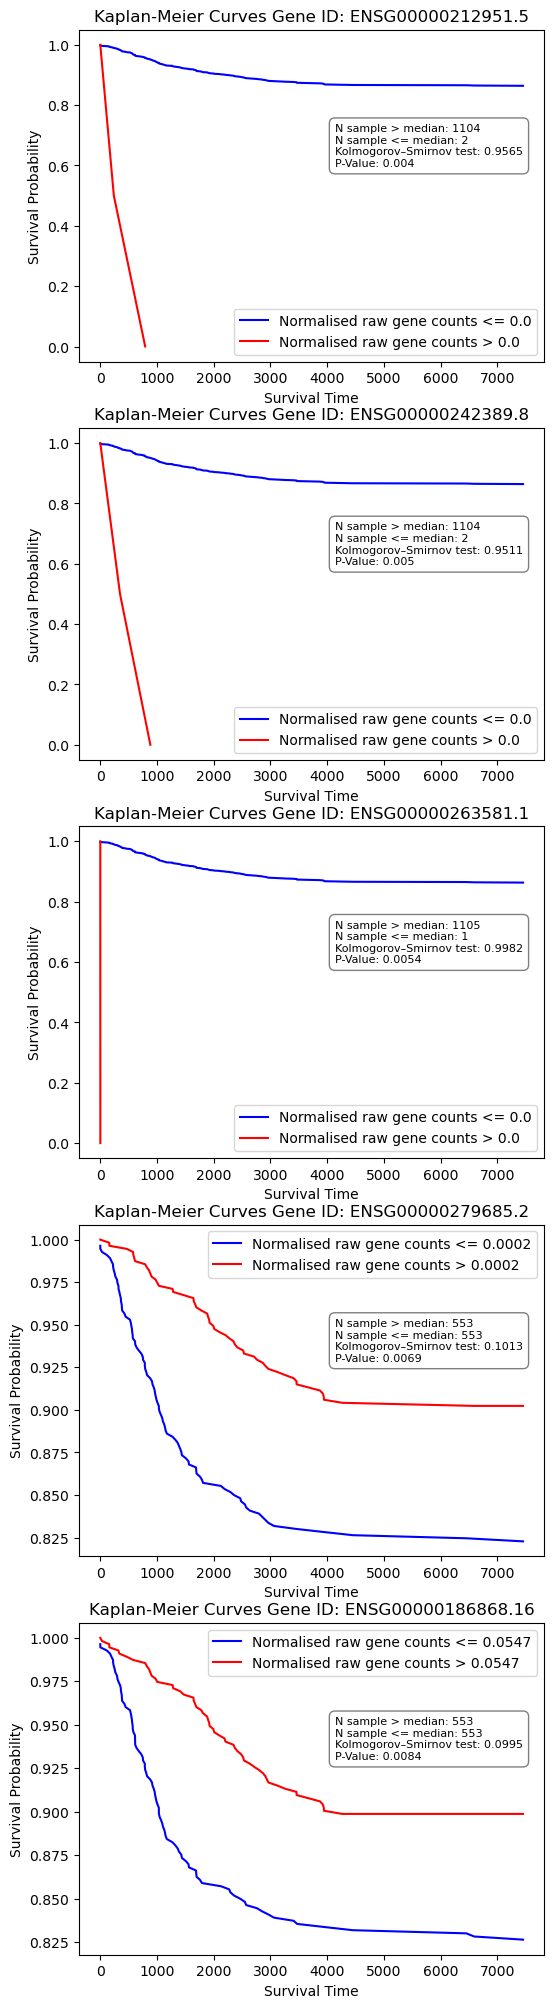

In [372]:
# Kaplan Meier
from lifelines import KaplanMeierFitter
kmf_l = KaplanMeierFitter()
kmf_h = KaplanMeierFitter()
gene_name = top_ks_gene
fig, axs = plt.subplots(len(gene_name), 1, figsize=(6, 5 * len(gene_name)))
for i, gene in enumerate(gene_name):
    plot_km_curve(gene, i)

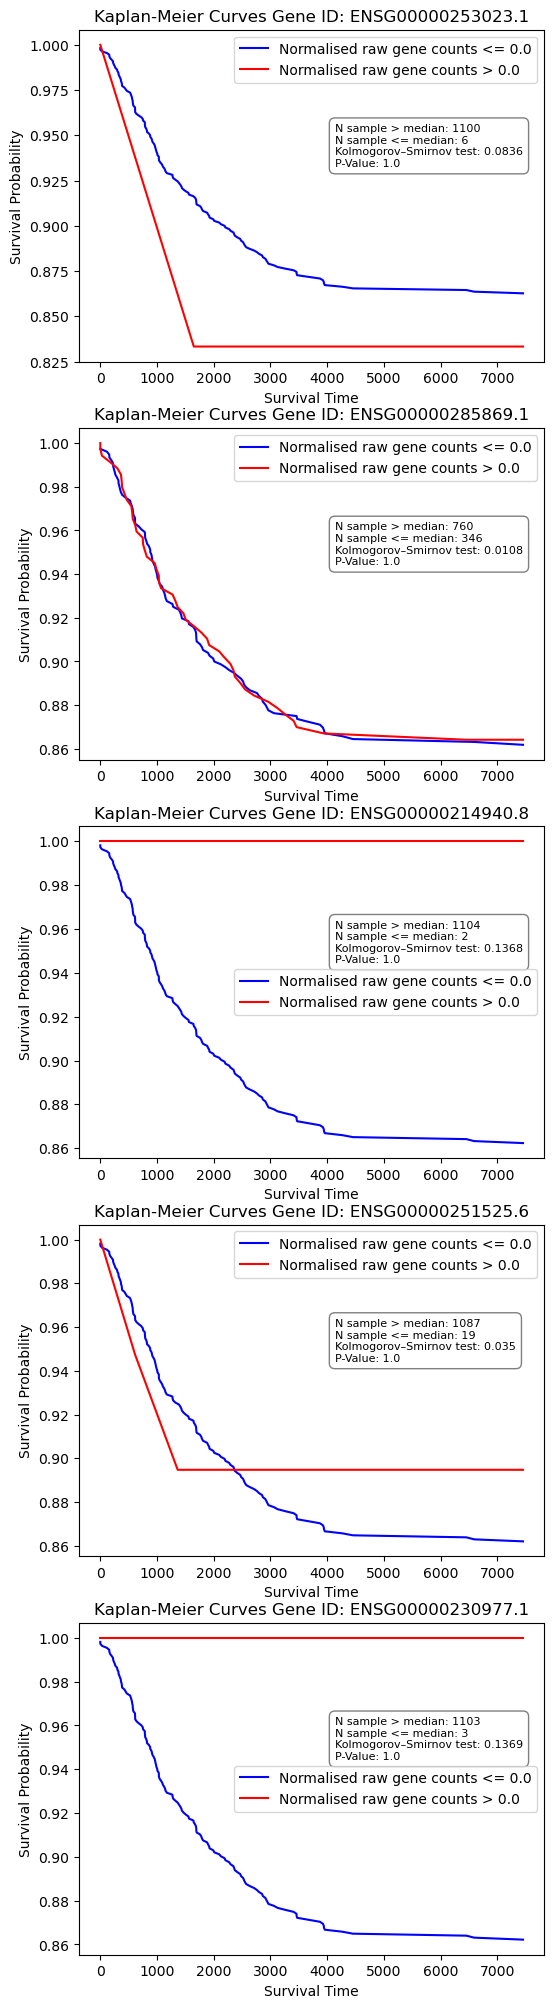

In [373]:
# Kaplan Meier
from lifelines import KaplanMeierFitter
kmf_l = KaplanMeierFitter()
kmf_h = KaplanMeierFitter()
gene_name = bottom_ks_gene
fig, axs = plt.subplots(len(gene_name), 1, figsize=(6, 5 * len(gene_name)))
for i, gene in enumerate(gene_name):
    plot_km_curve(gene, i)

## KL Divergence

In [246]:
gene = 'ENSG00000230977.1'

# Extract Sample ID from dictionary
low_risk_patients_gene = below_risk_patients[gene]
high_risk_patients_gene = above_risk_patients[gene]

# Extract days to death for such Sample ID
time_low_risk = risk_df[low_risk_patients_gene].iloc[-2]
time_high_risk = risk_df[high_risk_patients_gene].iloc[-2]

median = round(median_norm_data[gene], 2)

# P(x) = number of times X occurs / total number of possible outcomes
p1 = time_low_risk.value_counts(normalize=True)
q1 = time_high_risk.value_counts(normalize=True)

In [247]:
p1

days_to_death
7455    0.863101
2965    0.002720
1034    0.001813
792     0.001813
385     0.001813
          ...   
1152    0.000907
912     0.000907
2573    0.000907
723     0.000907
1781    0.000907
Name: proportion, Length: 144, dtype: float64

In [248]:
import numpy as np
from scipy.special import kl_div

# Compute KL divergence between the survival distributions of the two groups
kl_divergence = kl_div(p1, q1)

print("KL Divergence:", kl_divergence.sum())

KL Divergence: 0.00983025094473744


In [252]:
from scipy.special import kl_div

kl_list = []

for gene in risk_df.iloc[:60660, :].index:

    # Extract Sample ID from dictionary
    low_risk_patients_gene = below_risk_patients[gene]
    high_risk_patients_gene = above_risk_patients[gene]

    # Extract days to death for such Sample ID
    time_low_risk = risk_df[low_risk_patients_gene].iloc[-2]
    time_high_risk = risk_df[high_risk_patients_gene].iloc[-2]

    # P(x) = number of times X occurs / total number of possible outcomes
    p = time_low_risk.value_counts(normalize=True)
    q = time_high_risk.value_counts(normalize=True)

    kl_divergence = kl_div(p, q)
    kl_divergence = round(kl_divergence.sum(), 8)

    kl_dict = {
        'gene': gene,
        'kl_divergence': kl_divergence
    }

    kl_list.append(kl_dict)

In [285]:
kl_result = pd.DataFrame(kl_list)
kl_result = kl_result.sort_values(by='kl_divergence', ascending=False)
kl_result_valid = kl_result.loc[kl_result['kl_divergence'] != 0]
kl_result_valid

,gene,kl_divergence
34751,ENSG00000238235.1,9.927533e-01
26606,ENSG00000226270.3,9.927533e-01
57841,ENSG00000285064.2,9.927533e-01
50279,ENSG00000269900.3,9.927533e-01
60573,ENSG00000288567.1,6.020242e-01
...,...,...
32383,ENSG00000234764.2,2.000000e-08
42938,ENSG00000255528.1,2.000000e-08
49572,ENSG00000267740.5,2.000000e-08
48747,ENSG00000266525.1,2.000000e-08


In [286]:
n = 5
top_kl = kl_result_valid.iloc[:n, :]
top_kl_gene = top_kl['gene']
bottom_kl = kl_result_valid.iloc[-n:, :]
bottom_kl_gene = bottom_kl['gene']

In [288]:
summary_table.loc[top_kl_gene]

,> median,<= median,IR
Gene ID,,,
ENSG00000238235.1,1105,1,1104.9890
ENSG00000226270.3,1105,1,1104.9890
ENSG00000285064.2,1105,1,1104.9890
ENSG00000269900.3,1105,1,1104.9890
ENSG00000288567.1,1104,2,551.9972


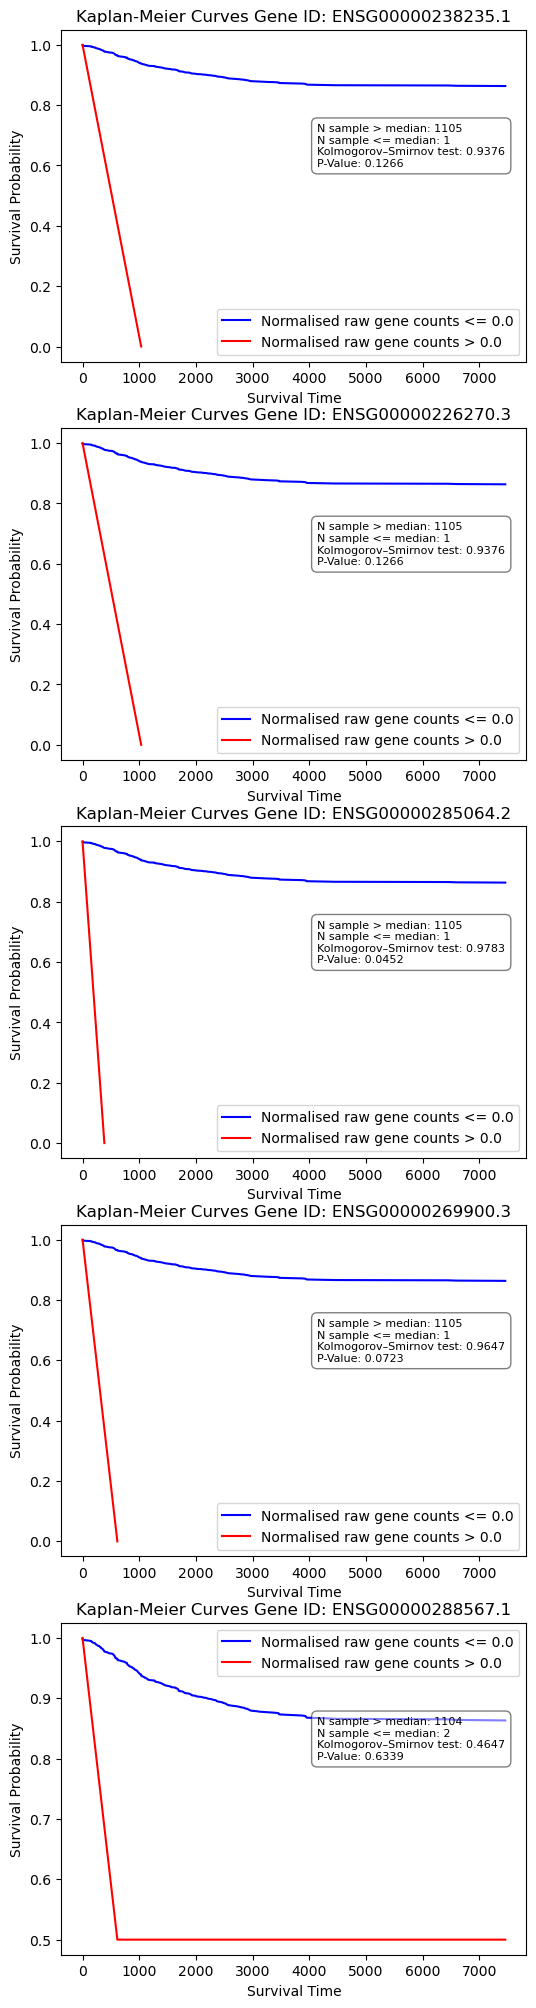

In [374]:
# Kaplan Meier
from lifelines import KaplanMeierFitter
kmf_l = KaplanMeierFitter()
kmf_h = KaplanMeierFitter()
gene_name = top_kl_gene
fig, axs = plt.subplots(len(gene_name), 1, figsize=(6, 5 * len(gene_name)))
for i, gene in enumerate(gene_name):
    plot_km_curve(gene, i)

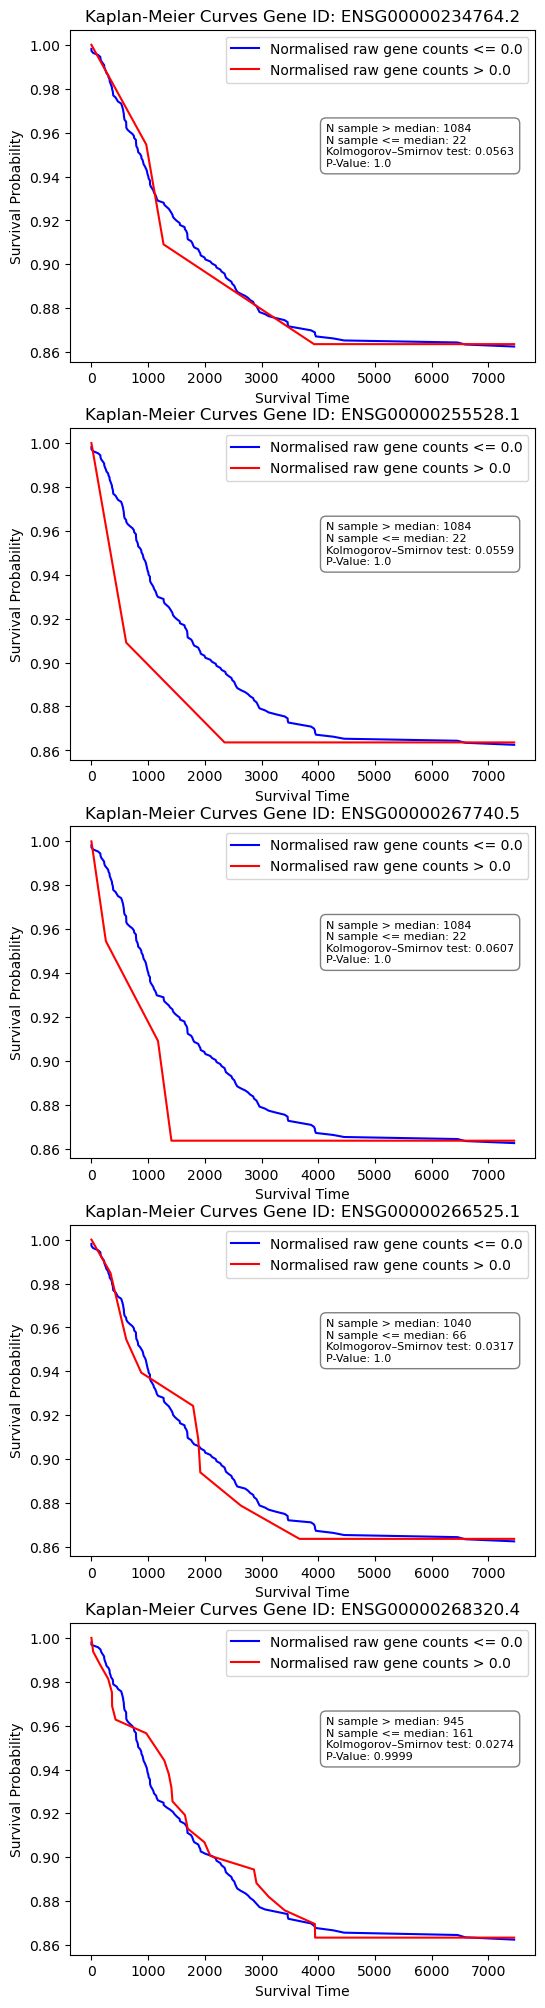

In [375]:
# Kaplan Meier
from lifelines import KaplanMeierFitter
kmf_l = KaplanMeierFitter()
kmf_h = KaplanMeierFitter()
gene_name = bottom_kl_gene
fig, axs = plt.subplots(len(gene_name), 1, figsize=(6, 5 * len(gene_name)))
for i, gene in enumerate(gene_name):
    plot_km_curve(gene, i)